<a href="https://colab.research.google.com/github/IvanLudvig/ComputationalMaths/blob/master/5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mu = 0.012277471
eta = 1 - mu
A = lambda x, y: math.sqrt(((x+mu)**2 + y**2)**3)
B = lambda x, y: math.sqrt(((x-eta)**2 + y**2)**3)
f1 = lambda x, u, y, v: u
f2 = lambda x, u, y, v: x + 2*v - eta*((x+mu)/A(x,y)) - mu*((x-eta)/B(x,y))
f3 = lambda x, u, y, v: v
f4 = lambda x, u, y, v: y - 2*u - eta*(y/A(x,y)) - mu*(y/B(x,y))
f = lambda t, u: np.array([f(u[0], u[1], u[2], u[3]) for f in [f1, f2, f3, f4]])

u0 = np.array([0.994, 0, 0, -2.00158510637908252240537862224])

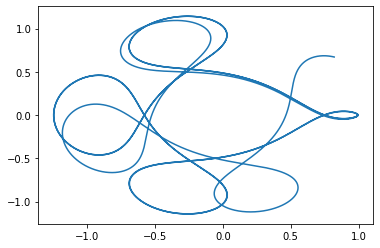

In [3]:
from scipy.integrate import odeint

f_ut = lambda u, t: f(t, u)

xs = np.linspace(0, 17*3, 30000000)
us = odeint(f_ut, u0, xs)
plt.plot(us[:, 0], us[:, 2])

In [4]:
def rk4(f, t, u, h):
    k1 = h * f(t, u)
    k2 = h * f(t + 0.5*h, u + 0.5*k1)
    k3 = h * f(t + 0.5*h, u + 0.5*k2)
    k4 = h * f(t + h, u + k3)
    return u + (k1/6) + (k2/3) + (k3/3) + (k4/6)

In [5]:
eps = 1e-5
def dormand_prince(f, t, u, h):
    k1 = h * f(t, u)
    k2 = h * f(t + (1/5)*h, u + (1/5)*k1)
    k3 = h * f(t + (3/10)*h, u + (3/40)*k1 + (9/40)*k2)
    k4 = h * f(t + (4/5)*h, u + (44/45)*k1 - (56/15)*k2 + (32/9)*k3)
    k5 = h * f(t + (8/9)*h, u + (19372/6561)*k1 - (25360/2187)*k2 + (64448/6561)*k3 - (212/729)*k4)
    k6 = h * f(t + h, u + (9017/3168)*k1 - (355/33)*k2 - (46732/5247)*k3 + (49/176)*k4 - (5103/18656)*k5)
    k7 = h * f(t + h, u + (35/384)*k1 + (500/1113)*k3 + (125/192)*k4 - (2187/6784)*k5 + (11/84)*k6)

    y1 = u + (35/384)*k1 + (500/1113)*k3 + (125/192)*k4 - (2187/6784)*k5 + (11/84)*k6
    y2 = u + (5179/57600)*k1 + (7571/16695)*k3 + (393/640)*k4 - (92097/339200)*k5 + (187/2100)*k6 + (1/40)*k7
    
    # h_opt = math.pow((h**2) * eps / (2 * np.linalg.norm(y1-y2)), 1/3)
    # return (y2, h_opt)
    return y2

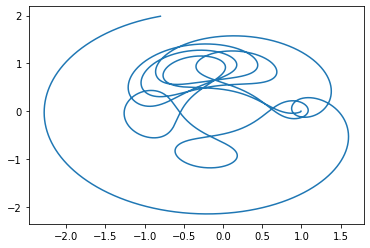

In [6]:
T = 17*3
h = 1e-5
N = int(T/h) + 1
uu = [0]*(1 + N//100)

u = u0
uu[0] = u

t = 0
i = 1
while i < N:
    u = dormand_prince(f, t, u, h)
    # u = rk4(f, t, u, h)
    if i % 100 == 0:
      uu[i//100] = u
    i += 1
    t += h

uu = np.array(uu)
plt.plot(uu[:, 0], uu[:, 2])

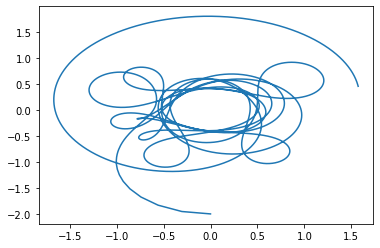

In [7]:
plt.plot(uu[:, 1], uu[:, 3])

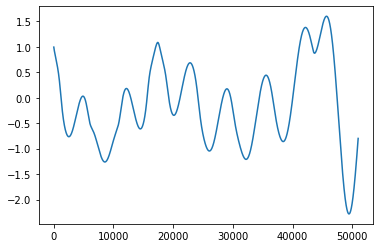

In [8]:
plt.plot(uu[:, 0])